In [21]:
import pandas as pd

In [22]:
df = pd.read_csv(r"C:\Users\Administrator\LIS\NTG Data.csv")

C:\Users\Administrator\AppData\Local\Temp\3\ipykernel_12012\4084321362.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\Administrator\LIS\NTG Data.csv")


In [23]:
df1 = df[['Visit ID','Question','Response']]

In [24]:
pivot_df = (
    df1.pivot_table(
        index='Visit ID',
        columns='Question',
        values='Response',
        aggfunc='first'  # take the first response if duplicates
    )
    .reset_index()
)


In [26]:
pivot_df.to_csv(r"C:\Users\Administrator\LIS\NTG Data pivot.csv")

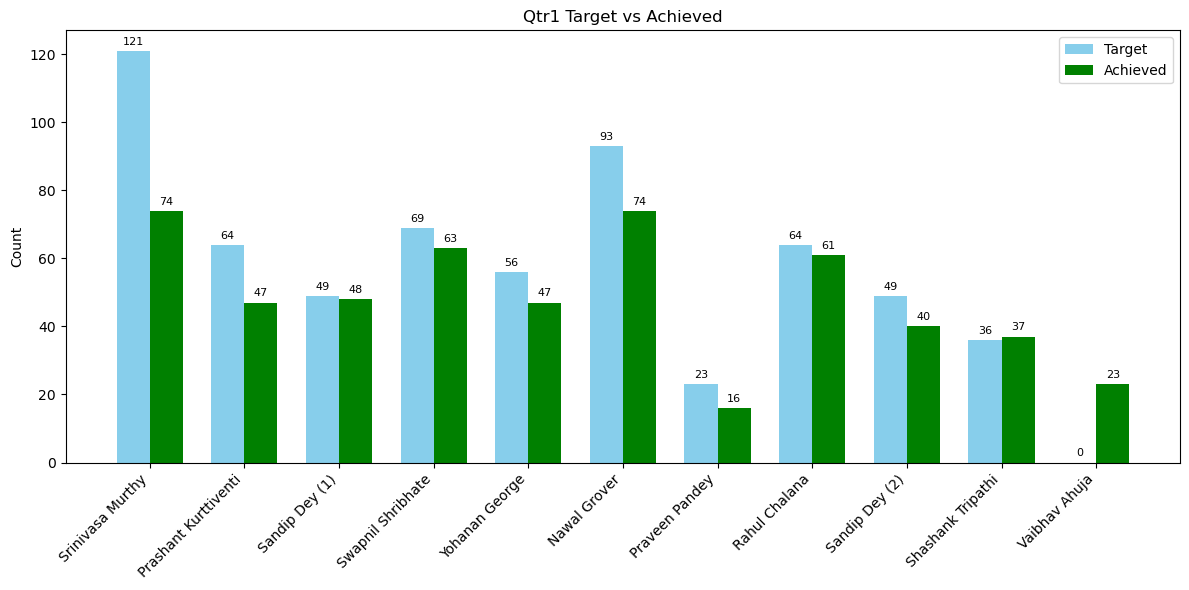

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data
data = {
    'SM': [
        'Srinivasa Murthy', 'Prashant Kurttiventi', 'Sandip Dey (1)', 'Swapnil Shribhate',
        'Yohanan George', 'Nawal Grover', 'Praveen Pandey', 'Rahul Chalana',
        'Sandip Dey (2)', 'Shashank Tripathi', 'Vaibhav Ahuja'
    ],
    'Target': [121, 64, 49, 69, 56, 93, 23, 64, 49, 36, 0],  # Replace '-' with 0
    'Achieved': [74, 47, 48, 63, 47, 74, 16, 61, 40, 37, 23]
}

df = pd.DataFrame(data)

# Set up positions for bars
x = np.arange(len(df['SM']))
width = 0.35  # Width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, df['Target'], width, label='Target', color='skyblue')
bars2 = ax.bar(x + width/2, df['Achieved'], width, label='Achieved', color='green')

# Add labels and title
ax.set_ylabel('Count')
ax.set_title('Qtr1 Target vs Achieved')
ax.set_xticks(x)
ax.set_xticklabels(df['SM'], rotation=45, ha='right')
ax.legend()

# Add data labels on top of bars
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


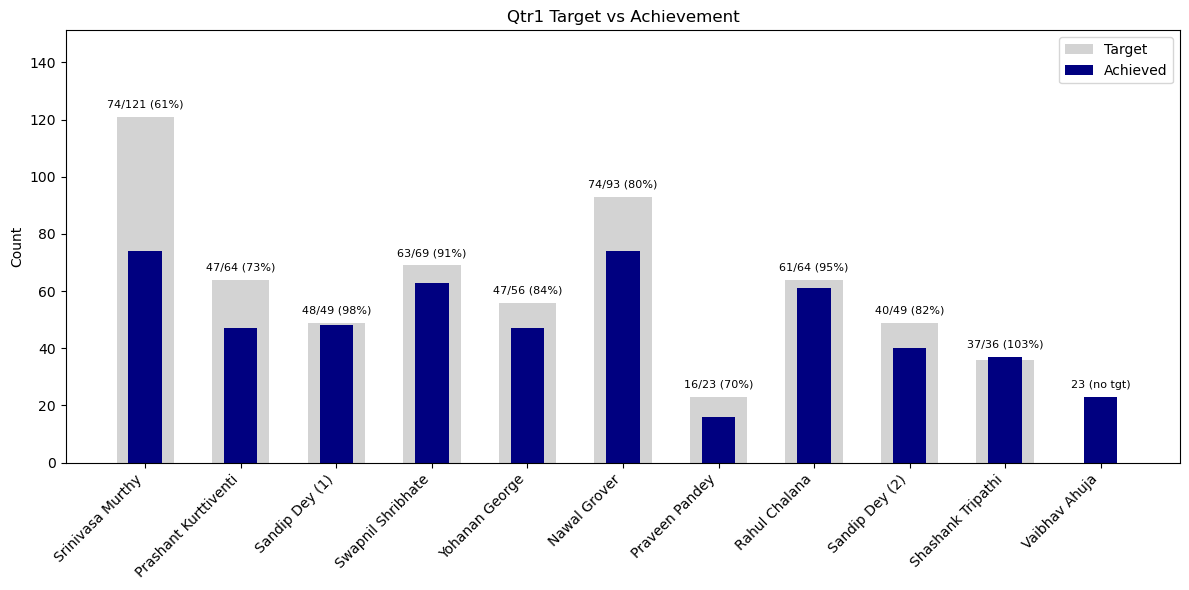

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Data --------------------------------------------------------------------
data = {
    'SM': [
        'Srinivasa Murthy', 'Prashant Kurttiventi', 'Sandip Dey (1)', 'Swapnil Shribhate',
        'Yohanan George', 'Nawal Grover', 'Praveen Pandey', 'Rahul Chalana',
        'Sandip Dey (2)', 'Shashank Tripathi', 'Vaibhav Ahuja'
    ],
    'Target':   [121, 64, 49, 69, 56, 93, 23, 64, 49, 36, 0],   # "-" -> 0
    'Achieved': [ 74, 47, 48, 63, 47, 74, 16, 61, 40, 37, 23]
}
df = pd.DataFrame(data)

# % achievement
df['Pct'] = np.where(df['Target']>0, df['Achieved']/df['Target'], np.nan)

# --- Plot --------------------------------------------------------------------
x = np.arange(len(df))
bar_w_target = 0.6
bar_w_ach    = 0.35  # narrower overlay bar

fig, ax = plt.subplots(figsize=(12,6))

# background target bars (grey)
ax.bar(x, df['Target'], width=bar_w_target, color='lightgray', label='Target', zorder=1)

# overlay achieved bars (dark)
ax.bar(x, df['Achieved'], width=bar_w_ach, color='navy', label='Achieved', zorder=2)

# labels: "Ach/Target (xx%)" OR "Ach (no tgt)"
max_val = max(df['Target'].max(), df['Achieved'].max())
for i,(ach,tgt,pct) in enumerate(zip(df['Achieved'], df['Target'], df['Pct'])):
    if tgt>0:
        txt = f"{ach}/{tgt} ({pct:.0%})"
        ypos = max(ach, tgt)  # top of taller bar
    else:
        txt = f"{ach} (no tgt)"
        ypos = ach
    ax.text(i, ypos + max_val*0.02, txt, ha='center', va='bottom', fontsize=8, rotation=0)

# x axis
ax.set_xticks(x)
ax.set_xticklabels(df['SM'], rotation=45, ha='right')

# y axis label + padding
ax.set_ylabel('Count')
ax.set_ylim(0, max_val*1.25)

ax.set_title('Qtr1 Target vs Achievement')
ax.legend()

plt.tight_layout()
plt.show()


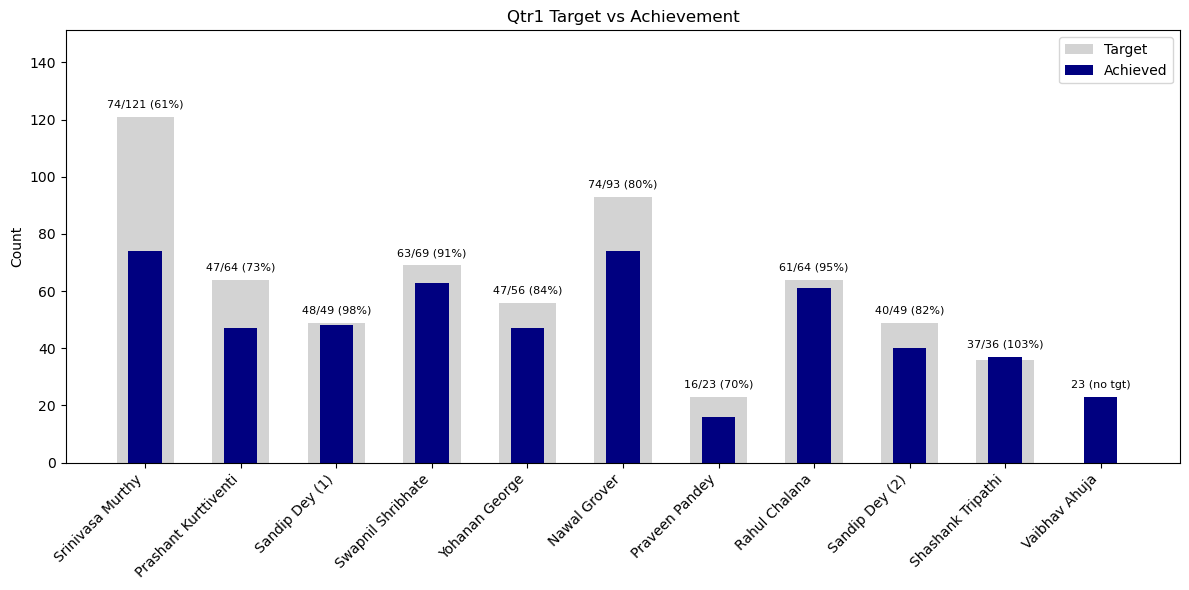

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Data --------------------------------------------------------------------
data = {
    'SM': [
        'Srinivasa Murthy', 'Prashant Kurttiventi', 'Sandip Dey (1)', 'Swapnil Shribhate',
        'Yohanan George', 'Nawal Grover', 'Praveen Pandey', 'Rahul Chalana',
        'Sandip Dey (2)', 'Shashank Tripathi', 'Vaibhav Ahuja'
    ],
    'Target':   [121, 64, 49, 69, 56, 93, 23, 64, 49, 36, 0],  # "-" -> 0
    'Achieved': [ 74, 47, 48, 63, 47, 74, 16, 61, 40, 37, 23]
}
df = pd.DataFrame(data)

# Calculate % Achievement
df['Pct'] = np.where(df['Target'] > 0, df['Achieved'] / df['Target'], np.nan)

# --- Plot --------------------------------------------------------------------
x = np.arange(len(df))
bar_w_target = 0.6
bar_w_ach = 0.35  # narrower overlay bar

fig, ax = plt.subplots(figsize=(12, 6))

# Plot Target as grey background bars
ax.bar(x, df['Target'], width=bar_w_target, color='lightgray', label='Target', zorder=1)

# Plot Achieved as dark blue bars on top
ax.bar(x, df['Achieved'], width=bar_w_ach, color='navy', label='Achieved', zorder=2)

# Add labels: "Ach/Target (xx%)"
max_val = max(df['Target'].max(), df['Achieved'].max())
for i, (ach, tgt, pct) in enumerate(zip(df['Achieved'], df['Target'], df['Pct'])):
    if tgt > 0:
        txt = f"{ach}/{tgt} ({pct:.0%})"
        ypos = max(ach, tgt)
    else:
        txt = f"{ach} (no tgt)"
        ypos = ach
    ax.text(i, ypos + max_val * 0.02, txt, ha='center', va='bottom', fontsize=8)

# X-axis settings
ax.set_xticks(x)
ax.set_xticklabels(df['SM'], rotation=45, ha='right')

# Y-axis settings
ax.set_ylabel('Count')
ax.set_ylim(0, max_val * 1.25)

# Title & Legend
ax.set_title('Qtr1 Target vs Achievement')
ax.legend()

plt.tight_layout()
plt.show()


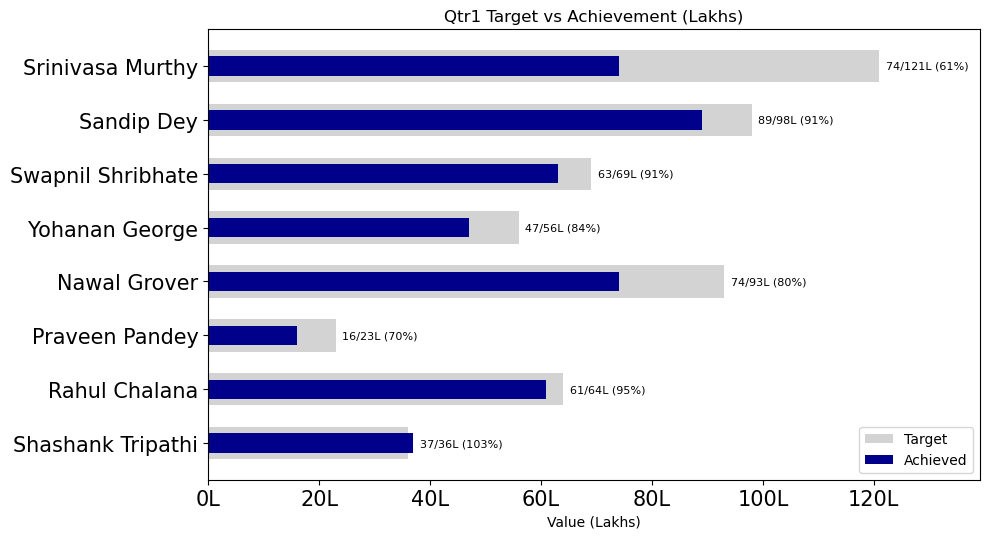

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# =============================================================================
# CONFIG
# =============================================================================
SCALE = 1  # 1 Lakh = 100,000. Change to 1 if data already in Lakhs.
DECIMALS_IN_LABEL = 0  # how many decimals to show in Lakh labels


# =============================================================================
# DATA
# Replace with your actual numbers (raw, pre-scale)
# =============================================================================
data = {
    'SM': [
        'Srinivasa Murthy', 'Sandip Dey', 'Swapnil Shribhate',
        'Yohanan George', 'Nawal Grover', 'Praveen Pandey', 'Rahul Chalana',
        'Shashank Tripathi'
    ],
    'Target':   [121, 98, 69, 56, 93, 23, 64, 36],   # "-" -> 0
    'Achieved': [ 74, 89, 63, 47, 74, 16, 61,37]
}
df = pd.DataFrame(data)

# =============================================================================
# DERIVED FIELDS
# =============================================================================
df['Pct'] = np.where(df['Target'] > 0, df['Achieved'] / df['Target'], np.nan)

# Scale to Lakhs (float)
df['Target_L']   = df['Target']   / SCALE
df['Achieved_L'] = df['Achieved'] / SCALE

# =============================================================================
# PLOT
# =============================================================================
fig, ax = plt.subplots(figsize=(10, 5.5))

y_pos = np.arange(len(df))
bar_h = 0.6  # background
ax.barh(
    y_pos,
    df['Target_L'],
    height=bar_h,
    color='lightgray',
    edgecolor='none',
    label='Target',
    zorder=1
)

ax.barh(
    y_pos,
    df['Achieved_L'],
    height=bar_h * 0.6,  # narrower overlay
    color='darkblue',
    edgecolor='none',
    label='Achieved',
    zorder=2
)

# Labels: e.g., "0.74/1.21L (61%)" OR "0.23L (no tgt)"
max_target_L = df['Target_L'].max()
max_ach_L    = df['Achieved_L'].max()
x_pad = max(max_target_L, max_ach_L) * 0.01  # small right padding for text

for i, (ach, tgt, pct, achL, tgtL) in enumerate(zip(
        df['Achieved'], df['Target'], df['Pct'], df['Achieved_L'], df['Target_L'])):

    if tgt > 0:
        pct_txt = f"{pct:.0%}"
        txt = f"{achL:.{DECIMALS_IN_LABEL}f}/{tgtL:.{DECIMALS_IN_LABEL}f}L ({pct_txt})"
        xpos = max(achL, tgtL) + x_pad
    else:
        txt = f"{achL:.{DECIMALS_IN_LABEL}f}L (no tgt)"
        xpos = achL + x_pad

    ax.text(
        xpos,
        i,
        txt,
        va='center',
        ha='left',
        fontsize=8
    )

# Axis setup
ax.set_yticks(y_pos)
ax.set_yticklabels(df['SM'])
ax.invert_yaxis()  # top to bottom like the example

# Increase font size of tick labels
ax.tick_params(axis='x', labelsize=15)  # X-axis tick labels
ax.tick_params(axis='y', labelsize=15)  # Y-axis tick labels


ax.set_xlabel('Value (Lakhs)')
ax.set_title('Qtr1 Target vs Achievement (Lakhs)')

# X limits
x_max = max(max_target_L, max_ach_L)
ax.set_xlim(0, x_max * 1.15)

# Nice x tick formatter to show values with an "L" suffix
def lakh_fmt(x, pos):
    return f"{int(x)}L"  # 1 decimal on axis ticks; adjust if needed

ax.xaxis.set_major_formatter(plt.FuncFormatter(lakh_fmt))

ax.legend(loc='lower right')

plt.tight_layout()
plt.show()



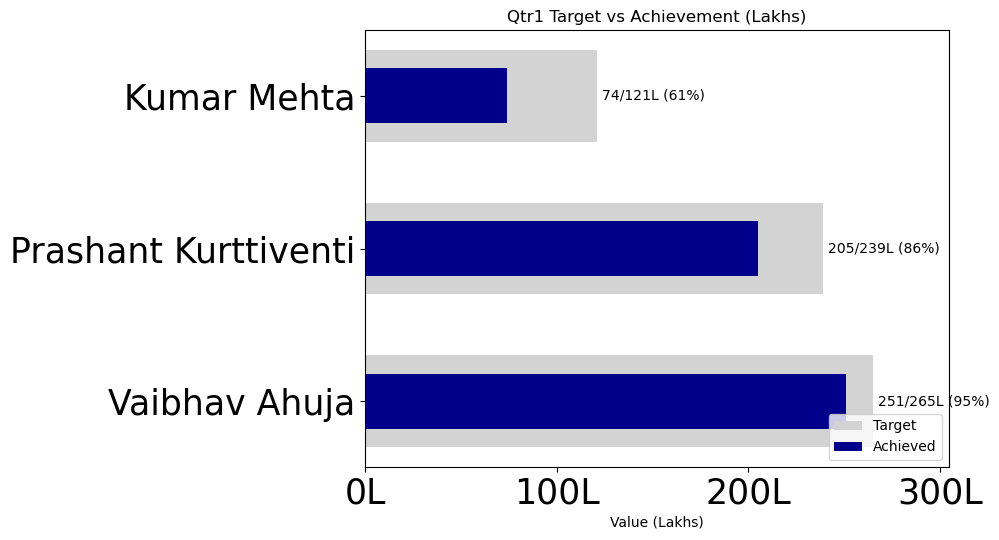

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# =============================================================================
# CONFIG
# =============================================================================
SCALE = 1  # 1 Lakh = 100,000. Change to 1 if data already in Lakhs.
DECIMALS_IN_LABEL = 0  # how many decimals to show in Lakh labels


# =============================================================================
# DATA
# Replace with your actual numbers (raw, pre-scale)
# =============================================================================
data = {
    'SM': [
        'Kumar Mehta','Prashant Kurttiventi','Vaibhav Ahuja'
    ],
    'Target':   [121,239,265],   # "-" -> 0
    'Achieved': [ 74,205,251]
}
df = pd.DataFrame(data)

# =============================================================================
# DERIVED FIELDS
# =============================================================================
df['Pct'] = np.where(df['Target'] > 0, df['Achieved'] / df['Target'], np.nan)

# Scale to Lakhs (float)
df['Target_L']   = df['Target']   / SCALE
df['Achieved_L'] = df['Achieved'] / SCALE

# =============================================================================
# PLOT
# =============================================================================
fig, ax = plt.subplots(figsize=(10, 5.5))

y_pos = np.arange(len(df))
bar_h = 0.6  # background
ax.barh(
    y_pos,
    df['Target_L'],
    height=bar_h,
    color='lightgray',
    edgecolor='none',
    label='Target',
    zorder=1
)

ax.barh(
    y_pos,
    df['Achieved_L'],
    height=bar_h * 0.6,  # narrower overlay
    color='darkblue',
    edgecolor='none',
    label='Achieved',
    zorder=2
)

# Labels: e.g., "0.74/1.21L (61%)" OR "0.23L (no tgt)"
max_target_L = df['Target_L'].max()
max_ach_L    = df['Achieved_L'].max()
x_pad = max(max_target_L, max_ach_L) * 0.01  # small right padding for text

for i, (ach, tgt, pct, achL, tgtL) in enumerate(zip(
        df['Achieved'], df['Target'], df['Pct'], df['Achieved_L'], df['Target_L'])):

    if tgt > 0:
        pct_txt = f"{pct:.0%}"
        txt = f"{achL:.{DECIMALS_IN_LABEL}f}/{tgtL:.{DECIMALS_IN_LABEL}f}L ({pct_txt})"
        xpos = max(achL, tgtL) + x_pad
    else:
        txt = f"{achL:.{DECIMALS_IN_LABEL}f}L (no tgt)"
        xpos = achL + x_pad

    ax.text(
        xpos,
        i,
        txt,
        va='center',
        ha='left',
        fontsize=10
    )

# Axis setup
ax.set_yticks(y_pos)
ax.set_yticklabels(df['SM'])
ax.invert_yaxis()  # top to bottom like the example


# Increase font size of tick labels
ax.tick_params(axis='x', labelsize=25)  # X-axis tick labels
ax.tick_params(axis='y', labelsize=25)  # Y-axis tick labels

ax.set_xlabel('Value (Lakhs)')
ax.set_title('Qtr1 Target vs Achievement (Lakhs)')

# X limits
x_max = max(max_target_L, max_ach_L)
ax.set_xlim(0, x_max * 1.15)

# Nice x tick formatter to show values with an "L" suffix
def lakh_fmt(x, pos):
    return f"{int(x)}L"  # 1 decimal on axis ticks; adjust if needed

ax.xaxis.set_major_formatter(plt.FuncFormatter(lakh_fmt))

ax.legend(loc='lower right')

plt.tight_layout()
plt.show()



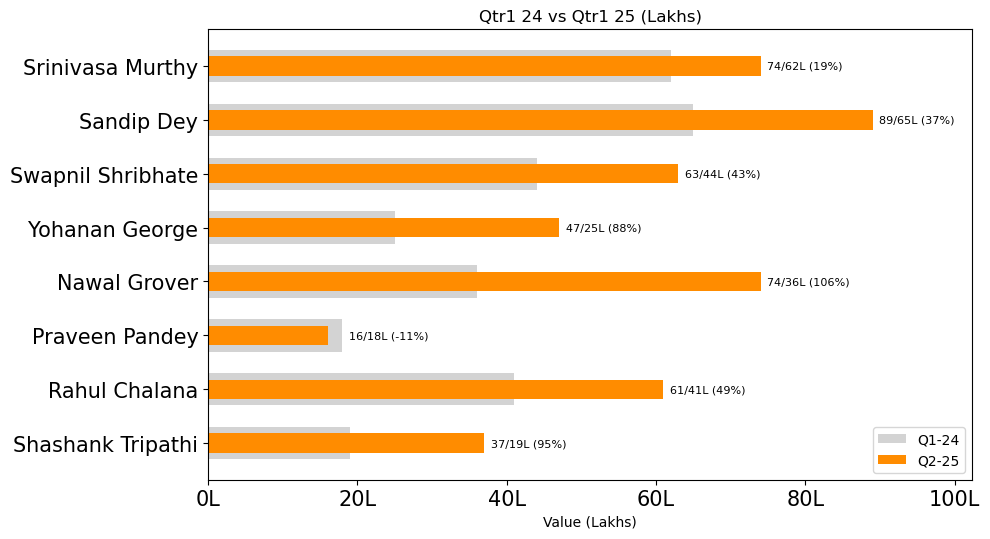

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# =============================================================================
# CONFIG
# =============================================================================
SCALE = 1  # 1 Lakh = 100,000. Change to 1 if data already in Lakhs.
DECIMALS_IN_LABEL = 0  # how many decimals to show in Lakh labels


# =============================================================================
# DATA
# Replace with your actual numbers (raw, pre-scale)
# =============================================================================
data = {
    'SM': [
        'Srinivasa Murthy', 'Sandip Dey', 'Swapnil Shribhate',
        'Yohanan George', 'Nawal Grover', 'Praveen Pandey', 'Rahul Chalana',
        'Shashank Tripathi'
    ],
    'Target':   [62, 65, 44, 25,36, 18, 41,19],   # "-" -> 0
    'Achieved': [ 74, 89, 63, 47, 74, 16, 61,37]
}
df = pd.DataFrame(data)

# =============================================================================
# DERIVED FIELDS
# =============================================================================
df['Pct'] = np.where(df['Target'] > 0, (df['Achieved'] / df['Target'])-1, np.nan)

# Scale to Lakhs (float)
df['Target_L']   = df['Target']   / SCALE
df['Achieved_L'] = df['Achieved'] / SCALE

# =============================================================================
# PLOT
# =============================================================================
fig, ax = plt.subplots(figsize=(10, 5.5))

y_pos = np.arange(len(df))
bar_h = 0.6  # background
ax.barh(
    y_pos,
    df['Target_L'],
    height=bar_h,
    color='lightgray',
    edgecolor='none',
    label='Q1-24',
    zorder=1
)

ax.barh(
    y_pos,
    df['Achieved_L'],
    height=bar_h * 0.6,  # narrower overlay
    color='darkorange',
    edgecolor='none',
    label='Q2-25',
    zorder=2
)

# Labels: e.g., "0.74/1.21L (61%)" OR "0.23L (no tgt)"
max_target_L = df['Target_L'].max()
max_ach_L    = df['Achieved_L'].max()
x_pad = max(max_target_L, max_ach_L) * 0.01  # small right padding for text

for i, (ach, tgt, pct, achL, tgtL) in enumerate(zip(
        df['Achieved'], df['Target'], df['Pct'], df['Achieved_L'], df['Target_L'])):

    if tgt > 0:
        pct_txt = f"{pct:.0%}"
        txt = f"{achL:.{DECIMALS_IN_LABEL}f}/{tgtL:.{DECIMALS_IN_LABEL}f}L ({pct_txt})"
        xpos = max(achL, tgtL) + x_pad
    else:
        txt = f"{achL:.{DECIMALS_IN_LABEL}f}L (no tgt)"
        xpos = achL + x_pad

    ax.text(
        xpos,
        i,
        txt,
        va='center',
        ha='left',
        fontsize=8
    )

# Axis setup
ax.set_yticks(y_pos)
ax.set_yticklabels(df['SM'])
ax.invert_yaxis()  # top to bottom like the example

# Increase font size of tick labels
ax.tick_params(axis='x', labelsize=15)  # X-axis tick labels
ax.tick_params(axis='y', labelsize=15)  # Y-axis tick labels


ax.set_xlabel('Value (Lakhs)')
ax.set_title('Qtr1 24 vs Qtr1 25 (Lakhs)')

# X limits
x_max = max(max_target_L, max_ach_L)
ax.set_xlim(0, x_max * 1.15)

# Nice x tick formatter to show values with an "L" suffix
def lakh_fmt(x, pos):
    return f"{int(x)}L"  # 1 decimal on axis ticks; adjust if needed

ax.xaxis.set_major_formatter(plt.FuncFormatter(lakh_fmt))

ax.legend(loc='lower right')

plt.tight_layout()
plt.show()



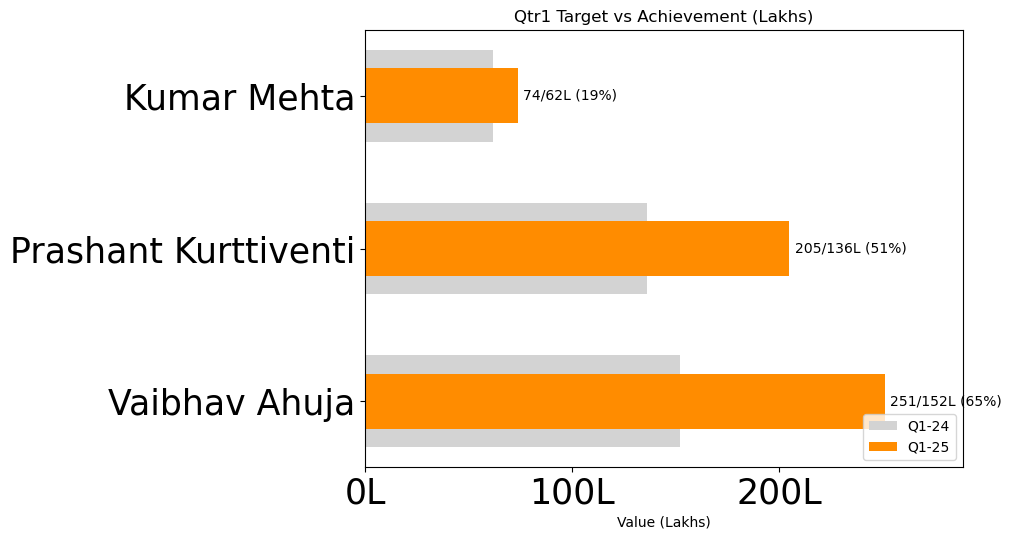

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# =============================================================================
# CONFIG
# =============================================================================
SCALE = 1  # 1 Lakh = 100,000. Change to 1 if data already in Lakhs.
DECIMALS_IN_LABEL = 0  # how many decimals to show in Lakh labels


# =============================================================================
# DATA
# Replace with your actual numbers (raw, pre-scale)
# =============================================================================
data = {
    'SM': [
        'Kumar Mehta','Prashant Kurttiventi','Vaibhav Ahuja'
    ],
    'Target':   [62,136,152],   # "-" -> 0
    'Achieved': [ 74,205,251]
}
df = pd.DataFrame(data)

# =============================================================================
# DERIVED FIELDS
# =============================================================================
df['Pct'] = np.where(df['Target'] > 0, (df['Achieved'] / df['Target'])-1, np.nan)

# Scale to Lakhs (float)
df['Target_L']   = df['Target']   / SCALE
df['Achieved_L'] = df['Achieved'] / SCALE

# =============================================================================
# PLOT
# =============================================================================
fig, ax = plt.subplots(figsize=(10, 5.5))

y_pos = np.arange(len(df))
bar_h = 0.6  # background
ax.barh(
    y_pos,
    df['Target_L'],
    height=bar_h,
    color='lightgray',
    edgecolor='none',
    label='Q1-24',
    zorder=1
)

ax.barh(
    y_pos,
    df['Achieved_L'],
    height=bar_h * 0.6,  # narrower overlay
    color='darkorange',
    edgecolor='none',
    label='Q1-25',
    zorder=2
)

# Labels: e.g., "0.74/1.21L (61%)" OR "0.23L (no tgt)"
max_target_L = df['Target_L'].max()
max_ach_L    = df['Achieved_L'].max()
x_pad = max(max_target_L, max_ach_L) * 0.01  # small right padding for text

for i, (ach, tgt, pct, achL, tgtL) in enumerate(zip(
        df['Achieved'], df['Target'], df['Pct'], df['Achieved_L'], df['Target_L'])):

    if tgt > 0:
        pct_txt = f"{pct:.0%}"
        txt = f"{achL:.{DECIMALS_IN_LABEL}f}/{tgtL:.{DECIMALS_IN_LABEL}f}L ({pct_txt})"
        xpos = max(achL, tgtL) + x_pad
    else:
        txt = f"{achL:.{DECIMALS_IN_LABEL}f}L (no tgt)"
        xpos = achL + x_pad

    ax.text(
        xpos,
        i,
        txt,
        va='center',
        ha='left',
        fontsize=10
    )

# Axis setup
ax.set_yticks(y_pos)
ax.set_yticklabels(df['SM'])
ax.invert_yaxis()  # top to bottom like the example


# Increase font size of tick labels
ax.tick_params(axis='x', labelsize=25)  # X-axis tick labels
ax.tick_params(axis='y', labelsize=25)  # Y-axis tick labels

ax.set_xlabel('Value (Lakhs)')
ax.set_title('Qtr1 Target vs Achievement (Lakhs)')

# X limits
x_max = max(max_target_L, max_ach_L)
ax.set_xlim(0, x_max * 1.15)

# Nice x tick formatter to show values with an "L" suffix
def lakh_fmt(x, pos):
    return f"{int(x)}L"  # 1 decimal on axis ticks; adjust if needed

ax.xaxis.set_major_formatter(plt.FuncFormatter(lakh_fmt))

ax.legend(loc='lower right')

plt.tight_layout()
plt.show()

